# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

## Load data

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages =  pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


## Prepare the data

Plan is to check for duplicates, column names and value types.

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
print(plans.sample(2))
#only 2 rows

   messages_included  mb_per_month_included  minutes_included  \
1               1000                  30720              3000   
0                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
1               70           7             0.01            0.01  ultimate  
0               20          10             0.03            0.03      surf  


## Fix data

Changed the megabytes per month column to match the gigabytes per month as it is in the plan and converted to int

In [5]:
plans['mb_per_month_included'] = plans['mb_per_month_included']/1024
#divide by 1024 to convert to gbs
plans.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True)
plans['gb_per_month_included'] = plans['gb_per_month_included'].astype(int)
print(plans)
plans.info()

   messages_included  gb_per_month_included  minutes_included  \
0                 50                     15               500   
1               1000                     30              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   pla

CHECK FOR DUPLICATES AND NAN COLUMNS

In [6]:
plans_dup = plans[plans.duplicated()]
print(plans_dup)
print('----------------------------------------')
print(plans.isna().sum())


Empty DataFrame
Columns: [messages_included, gb_per_month_included, minutes_included, usd_monthly_pay, usd_per_gb, usd_per_message, usd_per_minute, plan_name]
Index: []
----------------------------------------
messages_included        0
gb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


## Enrich data

No added columns

## Users

In [7]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Print a sample of data for users
print(users.sample(5))

     user_id first_name  last_name  age  \
431     1431   Napoleon       Burt   74   
216     1216      Reita     Atkins   29   
468     1468     Johana        Kim   55   
381     1381     German     Burris   44   
407     1407    Tristan  Daugherty   27   

                                          city    reg_date      plan  \
431        Sacramento–Roseville–Folsom, CA MSA  2018-01-28      surf   
216     San Francisco-Oakland-Berkeley, CA MSA  2018-06-19      surf   
468             Denver-Aurora-Lakewood, CO MSA  2018-09-08      surf   
381       Austin-Round Rock-Georgetown, TX MSA  2018-08-30      surf   
407  New York-Newark-Jersey City, NY-NJ-PA MSA  2018-11-29  ultimate   

    churn_date  
431        NaN  
216        NaN  
468        NaN  
381        NaN  
407        NaN  


Change the reg date and churn date in proper data type

### Fix Data

Checking for duplicates and nan 

In [9]:
users_dup = users[users.duplicated()]
print(users_dup)
print('----------------------------------------')
print(users.isna().sum())

Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []
----------------------------------------
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


Changing reg_date and churn date to the correct format.

In [10]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

user_id_dup = users[users['user_id'].duplicated()]
print(user_id_dup)

Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []


### Enrich Data

Adding a month column as the plans are charged by month

In [11]:
users['reg_month'] = users['reg_date'].dt.month
users['churn_month'] = users['churn_date'].dt.month
users.info()
print(users.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   first_name   500 non-null    object        
 2   last_name    500 non-null    object        
 3   age          500 non-null    int64         
 4   city         500 non-null    object        
 5   reg_date     500 non-null    datetime64[ns]
 6   plan         500 non-null    object        
 7   churn_date   34 non-null     datetime64[ns]
 8   reg_month    500 non-null    int64         
 9   churn_month  34 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 39.2+ KB
     user_id first_name last_name  age  \
175     1175     Shiloh  Stafford   25   
481     1481       Roni      Frye   32   
86      1086      Adena    Macias   36   
388     1388        Thu      Noel   75   
316     1316   

## Calls

In [12]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Print a sample of data for calls
print(calls.sample(5))

             id  user_id   call_date  duration
97282  1347_108     1347  2018-09-13      9.12
67323  1241_159     1241  2018-10-01      2.63
62860  1226_259     1226  2018-07-20     16.62
72223  1256_713     1256  2018-09-24      1.79
75028  1264_380     1264  2018-11-16     11.61


### Fix data

In [14]:
calls_dup = calls[calls.duplicated()]
print(calls_dup)
print('----------------------------------------')
print(calls.isna().sum())

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.rename(columns={'id': 'unique_call_identifier'}, inplace=True)


Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []
----------------------------------------
id           0
user_id      0
call_date    0
duration     0
dtype: int64


### Enrich data

Add a monthly column to match plan pricing

In [15]:
calls['true_duration'] = np.ceil(calls['duration'])
#round up duration column to match pricing per minute
calls['month'] = calls['call_date'].dt.month
print(calls.sample(10))

       unique_call_identifier  user_id  call_date  duration  true_duration  \
16468                1064_326     1064 2018-06-24      3.99            4.0   
1345                 1007_366     1007 2018-10-08     22.20           23.0   
109179               1385_249     1385 2018-12-06     24.34           25.0   
75991                1268_495     1268 2018-09-17      0.00            0.0   
109668                1387_40     1387 2018-12-04     17.83           18.0   
106262               1374_358     1374 2018-06-14      0.43            1.0   
125635                1445_50     1445 2018-05-31      8.07            9.0   
48128                1174_105     1174 2018-12-18      4.01            5.0   
74935                1264_243     1264 2018-08-01      0.00            0.0   
34620                1130_140     1130 2018-09-22      9.97           10.0   

        month  
16468       6  
1345       10  
109179     12  
75991       9  
109668     12  
106262      6  
125635      5  
48128      12

## Messages

In [16]:
# Print the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Print a sample of data for messages
print(messages.sample(5))

             id  user_id message_date
7621   1059_505     1059   2018-12-30
34037  1214_131     1214   2018-10-15
36727   1246_31     1246   2018-03-28
24048  1144_553     1144   2018-07-22
45245  1304_101     1304   2018-11-28


Rename 'id' column for less confusion and change 'message_date' column data type.

### Fix data

In [18]:
messages_dup = messages[messages.duplicated()]
print(messages_dup)
print('----------------------------------------')
print(messages.isna().sum())

messages.rename(columns={'id': 'unique_text_message_identifier'}, inplace=True)
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')


Empty DataFrame
Columns: [id, user_id, message_date]
Index: []
----------------------------------------
id              0
user_id         0
message_date    0
dtype: int64


### Enrich data

Add a 'month' column to match plan pricing

In [19]:
messages['month'] = messages['message_date'].dt.month
print(messages.sample(10))

      unique_text_message_identifier  user_id message_date  month
65325                       1419_134     1419   2018-11-19     11
49688                       1328_646     1328   2018-08-04      8
12346                        1081_92     1081   2018-11-25     11
41563                        1267_74     1267   2018-12-09     12
19343                        1125_11     1125   2018-12-27     12
20083                        1128_52     1128   2018-10-12     10
2291                        1028_200     1028   2018-09-30      9
20560                       1130_235     1130   2018-10-23     10
17000                        1113_57     1113   2018-07-11      7
25                           1001_32     1001   2018-09-11      9


## Internet

In [20]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
# Print a sample of data for the internet traffic
print(internet.sample(10))

              id  user_id session_date  mb_used
22927   1106_135     1106   2018-09-18   564.51
49406   1220_443     1220   2018-11-14   540.71
93129   1434_372     1434   2018-11-19   363.56
62348   1284_392     1284   2018-09-16   596.07
87555   1405_368     1405   2018-09-13    88.89
76031   1358_124     1358   2018-10-29   360.13
8500    1044_145     1044   2018-12-28   780.41
90082   1415_186     1415   2018-07-12   559.27
103758   1496_66     1496   2018-12-16   724.83
42376    1188_21     1188   2018-12-20   123.54


rename 'id' column adjust 'session_date' data type and change to gbs instead of mb in the 'mb_used' column

### Fix data

In [22]:
internet_dup = internet[internet.duplicated()]
print(internet_dup)
print('----------------------------------------')
print(internet.isna().sum())
# internet.rename(columns={'id': 'unique_session_identifier'}, inplace=True)
# internet.rename(columns={'mb_used': 'gb_used'}, inplace=True)
# internet['gb_used'] = internet['gb_used']/1024
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
print(internet.sample(10))

Empty DataFrame
Columns: [id, user_id, session_date, mb_used]
Index: []
----------------------------------------
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
             id  user_id session_date  mb_used
71649  1334_217     1334   2018-07-07   302.97
30199  1138_435     1138   2018-04-16     0.00
69719  1325_121     1325   2018-12-11   584.49
40440   1182_97     1182   2018-12-17   467.76
68045  1316_367     1316   2018-08-07   423.44
61569   1280_68     1280   2018-08-19   357.80
93914  1438_156     1438   2018-11-08   804.68
23150  1106_459     1106   2018-09-19   329.17
98231   1465_55     1465   2018-10-04    59.32
93539  1436_265     1436   2018-11-10    25.35


### Enrich data

Add a 'month' column

In [23]:
internet['month'] = internet['session_date'].dt.month
print(internet.sample(10))

              id  user_id session_date  mb_used  month
50730   1226_211     1226   2018-08-22   294.58      8
84106    1392_74     1392   2018-08-26   406.26      8
41407   1185_444     1185   2018-08-06     0.00      8
75238    1354_88     1354   2018-11-07   374.34     11
52369   1236_219     1236   2018-08-25   661.07      8
12158   1059_267     1059   2018-12-26   463.95     12
92124   1427_129     1427   2018-12-01   473.82     12
5403      1030_2     1030   2018-10-23    70.56     10
102354  1490_169     1490   2018-12-20   689.23     12
75087   1353_250     1353   2018-12-21   257.64     12


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [24]:
# Print out the plan conditions and make sure they are clear for you
print(plans)

   messages_included  gb_per_month_included  minutes_included  \
0                 50                     15               500   
1               1000                     30              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Surf Monthly charge: 20

500 monthly minutes
50 texts
15 GB of data
After exceeding the package limits:
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: 10

Ultimate Monthly charge: 70

3000 monthly minutes
1000 text messages
30 GB of data
After exceeding the package limits:
1 minute: 1 cent
1 text message: 1 cent
1 GB of data: 7

In [25]:
calls.columns
calls.head()

,unique_call_identifier,user_id,call_date,duration,true_duration,month
0,1000_93,1000,2018-12-27,8.52,9.0,12
1,1000_145,1000,2018-12-27,13.66,14.0,12
2,1000_247,1000,2018-12-27,14.48,15.0,12
3,1000_309,1000,2018-12-28,5.76,6.0,12
4,1000_380,1000,2018-12-30,4.22,5.0,12


## Aggregate data per user



In [26]:
# Calculate the number of calls made by each user per month. Save the result.
user_call_per_month = calls.groupby(['user_id','month'])['true_duration'].size().reset_index(name='number_of_monthly_calls')
print(user_call_per_month)


      user_id  month  number_of_monthly_calls
0        1000     12                       16
1        1001      8                       27
2        1001      9                       49
3        1001     10                       65
4        1001     11                       64
...       ...    ...                      ...
2253     1498     12                       39
2254     1499      9                       41
2255     1499     10                       53
2256     1499     11                       45
2257     1499     12                       65

[2258 rows x 3 columns]


In [27]:
# Calculate the amount of minutes spent by each user per month. Save the result.
user_call_minutes_per_month = calls.groupby(['user_id','month'])['true_duration'].sum().reset_index(name = 'number_of_monthly_minutes')
print(user_call_minutes_per_month)

      user_id  month  number_of_monthly_minutes
0        1000     12                      124.0
1        1001      8                      182.0
2        1001      9                      315.0
3        1001     10                      393.0
4        1001     11                      426.0
...       ...    ...                        ...
2253     1498     12                      339.0
2254     1499      9                      346.0
2255     1499     10                      385.0
2256     1499     11                      308.0
2257     1499     12                      496.0

[2258 rows x 3 columns]


In [28]:
# Calculate the number of messages sent by each user per month. Save the result.
user_messages_per_month = messages.groupby(['user_id','month']).size().reset_index(name='monthly_messages_sent')
print(user_messages_per_month)

      user_id  month  monthly_messages_sent
0        1000     12                     11
1        1001      8                     30
2        1001      9                     44
3        1001     10                     53
4        1001     11                     36
...       ...    ...                    ...
1801     1496      9                     21
1802     1496     10                     18
1803     1496     11                     13
1804     1496     12                     11
1805     1497     12                     50

[1806 rows x 3 columns]


In [29]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_vol_per_month = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index(name = 'monthly_mb_used')
internet_vol_per_month['sessions_per_month'] = internet.groupby(['user_id', 'month'])['mb_used'].count().values
internet_vol_per_month['monthly_mb_used'] = np.ceil(internet_vol_per_month['monthly_mb_used'])
print(internet_vol_per_month)

      user_id  month  monthly_mb_used  sessions_per_month
0        1000     12           1902.0                   5
1        1001      8           6920.0                  25
2        1001      9          13315.0                  53
3        1001     10          22331.0                  56
4        1001     11          18505.0                  51
...       ...    ...              ...                 ...
2272     1498     12          23138.0                  65
2273     1499      9          12985.0                  45
2274     1499     10          19493.0                  61
2275     1499     11          16814.0                  49
2276     1499     12          22060.0                  65

[2277 rows x 4 columns]


In [30]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merge_df1 = pd.merge(user_call_per_month,user_call_minutes_per_month,on =['user_id','month'], how = 'outer')
#print(merge_df1)
merge_df2 = pd.merge(merge_df1,user_messages_per_month, on = ['user_id','month'], how = 'outer')
#print(merge_df2)
complete_merge = pd.merge(merge_df2,internet_vol_per_month, on = ['user_id','month'], how = 'outer')
#print(complete_merge)

complete_merge = complete_merge.fillna(0)
print(complete_merge)

      user_id  month  number_of_monthly_calls  number_of_monthly_minutes  \
0        1000     12                     16.0                      124.0   
1        1001      8                     27.0                      182.0   
2        1001      9                     49.0                      315.0   
3        1001     10                     65.0                      393.0   
4        1001     11                     64.0                      426.0   
...       ...    ...                      ...                        ...   
2288     1349     12                      0.0                        0.0   
2289     1361      5                      0.0                        0.0   
2290     1482     10                      0.0                        0.0   
2291     1108     12                      0.0                        0.0   
2292     1311      6                      0.0                        0.0   

      monthly_messages_sent  monthly_mb_used  sessions_per_month  
0                   

In [31]:
# Add the plan information
#plan_merge = pd.merge(complete_merge,users, on=['user_id'], how = 'left')
plan_merge = pd.merge(complete_merge, users[['user_id', 'plan']], on='user_id', how='left')

# print(plan_merge)
plan_merge = pd.merge(plan_merge, users[['user_id', 'city']], on='user_id', how='left')

plan_merge.rename(columns={'monthly_mb_used': 'monthly_gb_used'}, inplace=True)
plan_merge['monthly_gb_used'] = plan_merge['monthly_gb_used']/1024
plan_merge['monthly_gb_used'] = np.ceil(plan_merge['monthly_gb_used'])

print(plan_merge)

      user_id  month  number_of_monthly_calls  number_of_monthly_minutes  \
0        1000     12                     16.0                      124.0   
1        1001      8                     27.0                      182.0   
2        1001      9                     49.0                      315.0   
3        1001     10                     65.0                      393.0   
4        1001     11                     64.0                      426.0   
...       ...    ...                      ...                        ...   
2288     1349     12                      0.0                        0.0   
2289     1361      5                      0.0                        0.0   
2290     1482     10                      0.0                        0.0   
2291     1108     12                      0.0                        0.0   
2292     1311      6                      0.0                        0.0   

      monthly_messages_sent  monthly_gb_used  sessions_per_month      plan  \
0        

In [32]:
# Calculate the monthly revenue for each user
surf_monthly_charge = 20
free_surf_minutes = 500
free_surf_texts = 50
free_surf_gbs = 15.0
surf_minute_price = 0.03
surf_text_price = 0.03
surf_data_price = 10
ultimate_monthly_charge = 70
free_ultimate_minutes = 3000
free_ultimate_texts = 100
free_ultimate_gbs = 30
ultimate_minute_price = 0.01
ultimate_text_price = 0.01
ultimate_data_price = 7
def monthly_revenue(row):
    if row['plan'] == 'surf':
        call_overage = max(0, row['number_of_monthly_minutes'] - free_surf_minutes)
        text_overage = max(0, row['monthly_messages_sent'] - free_surf_texts)
        data_overage = max(0, row['monthly_gb_used'] - free_surf_gbs)
# Calculate overage costs
        call_cost = call_overage * surf_minute_price
        text_cost = text_overage * surf_text_price
        data_cost = data_overage * surf_data_price
# Total monthly revenue
        total_revenue = surf_monthly_charge + call_cost + text_cost + data_cost
        return total_revenue
    else:
        call_overage = max(0, row['number_of_monthly_minutes'] - free_ultimate_minutes)
        text_overage = max(0, row['monthly_messages_sent'] - free_ultimate_texts)
        data_overage = max(0, row['monthly_gb_used'] - free_ultimate_gbs)
# Calculate overage costs
        call_cost = call_overage * ultimate_minute_price
        text_cost = text_overage * ultimate_text_price
        data_cost = data_overage * ultimate_data_price
# Total monthly revenue
        total_revenue = ultimate_monthly_charge + call_cost + text_cost + data_cost
        return total_revenue


plan_merge['monthly_revenue'] = plan_merge.apply(monthly_revenue, axis=1)

print(plan_merge.sample(10))

      user_id  month  number_of_monthly_calls  number_of_monthly_minutes  \
2271     1131      9                      0.0                        0.0   
629      1138      3                     53.0                      363.0   
823      1175     11                     89.0                      718.0   
139      1039      8                     80.0                      417.0   
1208     1261      2                     14.0                       56.0   
243      1056     10                     38.0                      282.0   
984      1212      8                     46.0                      290.0   
380      1081      4                      3.0                       16.0   
676      1146     11                     61.0                      448.0   
978      1211      8                     42.0                      371.0   

      monthly_messages_sent  monthly_gb_used  sessions_per_month      plan  \
2271                   26.0             16.0                32.0      surf   
629    

## Study user behaviour

### Calls

        plan  month  avg_monthly_call_duration
0       surf      1                   6.642857
1       surf      2                   6.814628
2       surf      3                   7.199957
3       surf      4                   7.040349
4       surf      5                   7.182627
5       surf      6                   7.215501
6       surf      7                   7.027745
7       surf      8                   7.127926
8       surf      9                   7.127642
9       surf     10                   7.103434
10      surf     11                   7.237324
11      surf     12                   7.218351
12  ultimate      1                   6.201915
13  ultimate      2                   7.062303
14  ultimate      3                   6.393757
15  ultimate      4                   7.215266
16  ultimate      5                   7.121973
17  ultimate      6                   7.110516
18  ultimate      7                   7.324718
19  ultimate      8                   7.018966
20  ultimate 

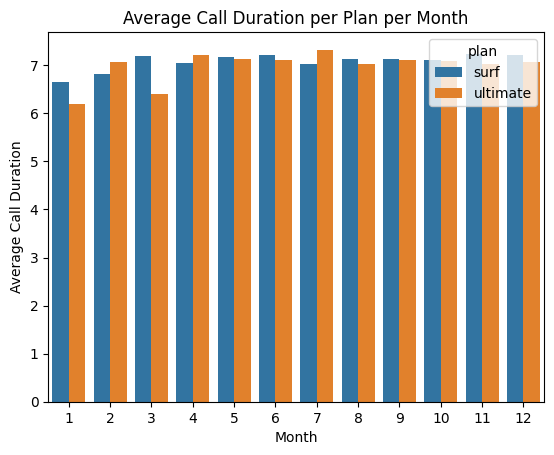

In [33]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
plan_merge['average_call_duration'] = plan_merge['number_of_monthly_minutes'] / plan_merge['number_of_monthly_calls']
#print(plan_merge.sample(10))

avg_monthly_call_duration = plan_merge.groupby(['plan','month',])['average_call_duration'].mean().reset_index(name = 'avg_monthly_call_duration')
print(avg_monthly_call_duration)

sns.barplot(data=avg_monthly_call_duration, x='month', y='avg_monthly_call_duration', hue='plan')

plt.xlabel('Month')
plt.ylabel('Average Call Duration')
plt.title('Average Call Duration per Plan per Month')
plt.show()

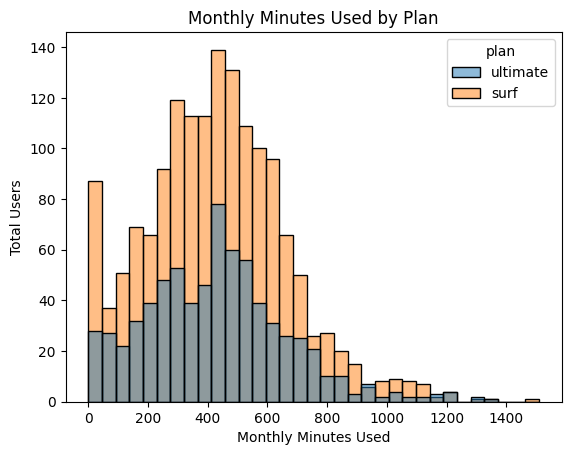

In [34]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
sns.histplot(data=plan_merge, x='number_of_monthly_minutes', hue='plan')

plt.xlabel('Monthly Minutes Used')
plt.ylabel('Total Users')
plt.title('Monthly Minutes Used by Plan')
plt.show()

In [35]:
# Calculate the mean and the variance of the monthly call duration
surf_call_duration_mean = plan_merge[plan_merge['plan'] == 'surf']['number_of_monthly_minutes'].mean()
print('Surf call duration mean is:', surf_call_duration_mean)
surf_call_duration_variance = plan_merge[plan_merge['plan'] == 'surf']['number_of_monthly_minutes'].var()
print('Surf call duration variance is:', surf_call_duration_variance)
surf_call_duration_std = plan_merge[plan_merge['plan'] == 'surf']['number_of_monthly_minutes'].std()
print('Surf call duration standard deviation is:', surf_call_duration_std)
ultimate_call_duration_mean = plan_merge[plan_merge['plan'] == 'ultimate']['number_of_monthly_minutes'].mean()
print('Ultimate call duration mean is:', ultimate_call_duration_mean)
ultimate_call_duration_variance = plan_merge[plan_merge['plan'] == 'ultimate']['number_of_monthly_minutes'].var()
print('Ultimate call duration variance is:', ultimate_call_duration_variance)
ultimate_call_duration_std = plan_merge[plan_merge['plan'] == 'ultimate']['number_of_monthly_minutes'].std()
print('Ultimate call duration standard deviation is:', ultimate_call_duration_std)



Surf call duration mean is: 428.7495232040687
Surf call duration variance is: 54968.27946065038
Surf call duration standard deviation is: 234.4531498202794
Ultimate call duration mean is: 430.45
Ultimate call duration variance is: 57844.46481223922
Ultimate call duration standard deviation is: 240.50876244378128


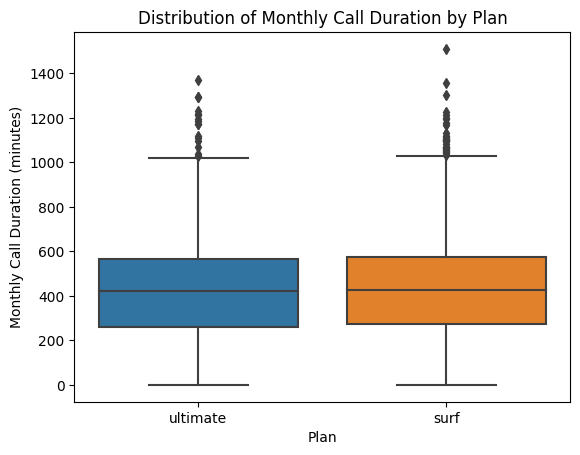

In [36]:
# Plot a boxplot to visualize the distribution of the monthly call duration
sns.boxplot(data=plan_merge, x='plan', y='number_of_monthly_minutes')

plt.xlabel('Plan')
plt.ylabel('Monthly Call Duration (minutes)')
plt.title('Distribution of Monthly Call Duration by Plan')
plt.show()


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great job with this graph.
    
</div>

It appears surf plan members push the boundaries of their minute limit as to where the ultimate plan users on average do not come close to pass their minute limits.The standard deviation for both plans is significantly high which could point to users having very different call duration. Some users may have short calls and others have long calls.

### Messages

    month      plan  total_text_sent
0       1      surf        10.500000
1       1  ultimate        15.500000
2       2      surf        12.000000
3       2  ultimate        21.571429
4       3      surf        15.260870
5       3  ultimate        20.250000
6       4      surf        17.400000
7       4  ultimate        22.047619
8       5      surf        24.012987
9       5  ultimate        32.103448
10      6      surf        25.298969
11      6  ultimate        29.340426
12      7      surf        27.033058
13      7  ultimate        32.830508
14      8      surf        28.777778
15      8  ultimate        38.478873
16      9      surf        30.762887
17      9  ultimate        37.895349
18     10      surf        33.839662
19     10  ultimate        39.443396
20     11      surf        32.385159
21     11  ultimate        38.606299
22     12      surf        38.600629
23     12  ultimate        45.006623


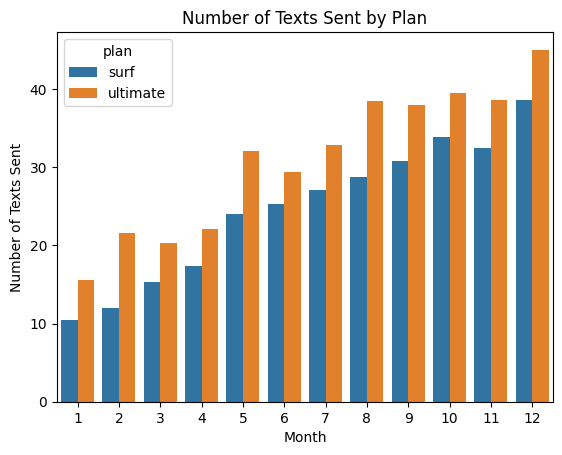

In [37]:
# Compare the number of messages users of each plan tend to send each month
#print(plan_merge)
monthly_texts_sent = plan_merge.groupby(['month','plan'])['monthly_messages_sent'].mean().reset_index(name='total_text_sent')
print(monthly_texts_sent)
sns.barplot(data=monthly_texts_sent, x='month', y='total_text_sent', hue='plan')

plt.xlabel('Month')
plt.ylabel('Number of Texts Sent')
plt.title('Number of Texts Sent by Plan')
plt.show()

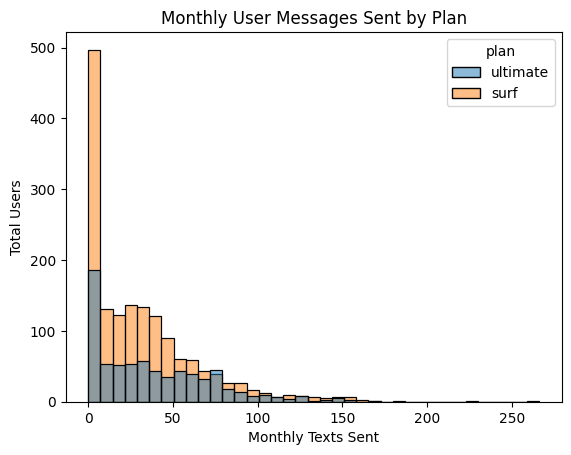

In [38]:
# Compare the number of texts users of each plan require each month. Plot a histogram.
sns.histplot(data=plan_merge, x='monthly_messages_sent', hue='plan')

plt.xlabel('Monthly Texts Sent')
plt.ylabel('Total Users')
plt.title('Monthly User Messages Sent by Plan')
plt.show()

In [39]:
# Calculate the mean and the variance of the monthly call duration
surf_texts_sent_mean = plan_merge[plan_merge['plan'] == 'surf']['monthly_messages_sent'].mean()
print('Surf texts sent mean is:', surf_texts_sent_mean)
surf_text_sent_variance = plan_merge[plan_merge['plan'] == 'surf']['monthly_messages_sent'].var()
print('Surf surf texts sent variance is:', surf_text_sent_variance)
surf_text_sent_std = plan_merge[plan_merge['plan'] == 'surf']['monthly_messages_sent'].std()
print('Surf text sent standard deviation is:', surf_text_sent_std )
ultimate_text_sent_mean = plan_merge[plan_merge['plan'] == 'ultimate']['monthly_messages_sent'].mean()
print('Ultimate texts sent mean is:',ultimate_text_sent_mean )
ultimate_text_sent_variance = plan_merge[plan_merge['plan'] == 'ultimate']['monthly_messages_sent'].var()
print('Ultimate texts sent variance is:', ultimate_text_sent_variance)
ultimate_text_sent_std = plan_merge[plan_merge['plan'] == 'ultimate']['monthly_messages_sent'].std()
print('Ultimate texts sent standard deviation is:', ultimate_text_sent_std)



Surf texts sent mean is: 31.15956770502225
Surf surf texts sent variance is: 1126.7245219504066
Surf text sent standard deviation is: 33.566717473569064
Ultimate texts sent mean is: 37.55138888888889
Ultimate texts sent variance is: 1208.756743548138
Ultimate texts sent standard deviation is: 34.76717911404574


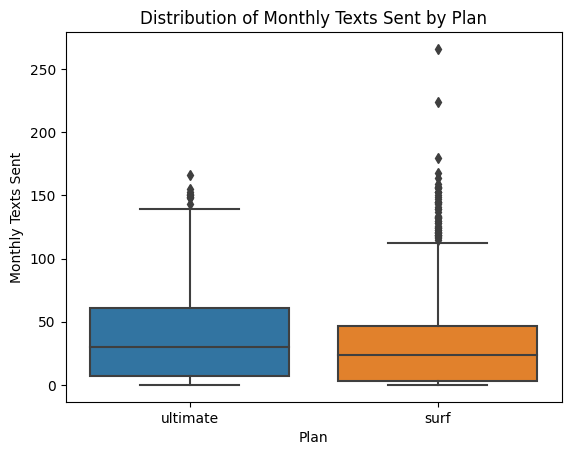

In [40]:
# Plot a boxplot to visualize the distribution of the monthly text sent
sns.boxplot(data=plan_merge, x='plan', y='monthly_messages_sent')

plt.xlabel('Plan')
plt.ylabel('Monthly Texts Sent')
plt.title('Distribution of Monthly Texts Sent by Plan')
plt.show()

    Same situation for messages as for minutes between ultimate and surf plan users. Not one ultimate plan user exceeded their message limit while over 30% of surf plan users surpassed their monthly limit. 

### Internet

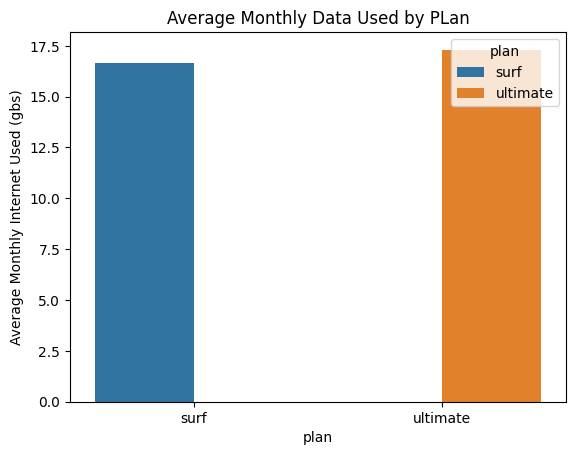

In [41]:
# Compare the amount of internet traffic consumed by users per plan
internet_traffic = plan_merge.groupby('plan')['monthly_gb_used'].mean().reset_index(name = 'average_monthly_traffic')
#print(internet_traffic)
sns.barplot(data = internet_traffic, x = 'plan', y='average_monthly_traffic', hue = 'plan')
plt.xlabel('plan')
plt.ylabel('Average Monthly Internet Used (gbs)')
plt.title('Average Monthly Data Used by PLan')
plt.show()

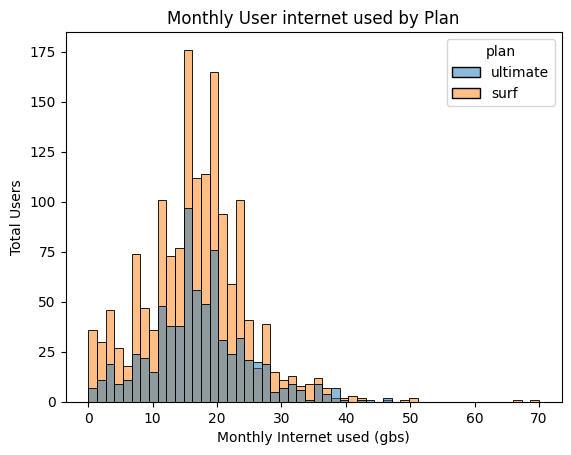

In [42]:
# Compare the amount of internet traffic users of each plan require each month. Plot a histogram.
sns.histplot(data=plan_merge, x='monthly_gb_used', hue='plan')

plt.xlabel('Monthly Internet used (gbs)')
plt.ylabel('Total Users')
plt.title('Monthly User internet used by Plan')
plt.show()

# count1 = (plan_merge[plan_merge['plan'] == 'surf']['monthly_gb_used']>45).sum()
# print(count1)

In [43]:
# Calculate the mean and the variance of the monthly call duration
surf_internet_usage_mean = plan_merge[plan_merge['plan'] == 'surf']['monthly_gb_used'].mean()
print('Surf internet usage mean is:', surf_internet_usage_mean)
surf_internet_usage_variance = plan_merge[plan_merge['plan'] == 'surf']['monthly_gb_used'].var()
print('Surf internet usage variance is:',surf_internet_usage_variance )
surf_internet_usage_std = plan_merge[plan_merge['plan'] == 'surf']['monthly_gb_used'].std()
print('Surf internet usage standard deviation is:', surf_internet_usage_std )
ultimate_internet_usage_mean = plan_merge[plan_merge['plan'] == 'ultimate']['monthly_gb_used'].mean()
print('Ultimate internet usage mean is:',ultimate_internet_usage_mean )
ultimate_internet_usage_variance = plan_merge[plan_merge['plan'] == 'ultimate']['monthly_gb_used'].var()
print('Ultimate internet usage variance is:', ultimate_internet_usage_variance)
ultimate_internet_usage_std = plan_merge[plan_merge['plan'] == 'ultimate']['monthly_gb_used'].std()
print('Ultimate internet usage standard deviation is:', ultimate_internet_usage_std)



Surf internet usage mean is: 16.670692943420217
Surf internet usage variance is: 61.58359983759012
Surf internet usage standard deviation is: 7.847521891501171
Ultimate internet usage mean is: 17.306944444444444
Ultimate internet usage variance is: 58.830549760469786
Ultimate internet usage standard deviation is: 7.670107545560869


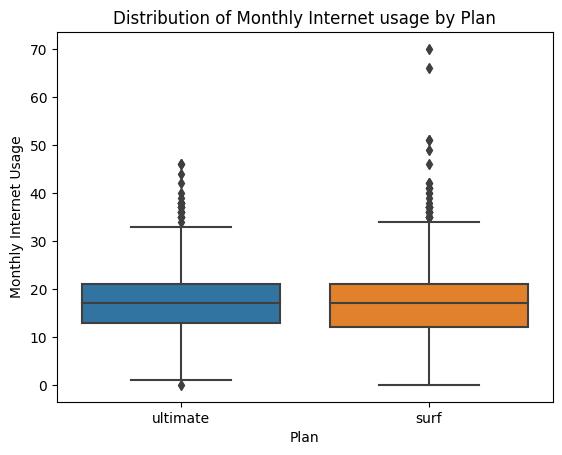

In [44]:
# Plot a boxplot to visualize the distribution of the monthly text sent
sns.boxplot(data=plan_merge, x='plan', y='monthly_gb_used')

plt.xlabel('Plan')
plt.ylabel('Monthly Internet Usage')
plt.title('Distribution of Monthly Internet usage by Plan')
plt.show()

    It doesnt appear that ultimate and surf plan users have too different internet monthly usage. The main difference is that the average monthly intertnet usage for surf plan members is over the plan limit. 

## Revenue

        plan  month       sum       mean
0       surf      1     40.00  20.000000
1       surf      2    309.57  34.396667
2       surf      3   1056.65  45.941304
3       surf      4   2035.53  40.710600
4       surf      5   3667.37  47.628182
5       surf      6   4779.80  49.276289
6       surf      7   7583.56  62.674050
7       surf      8  10356.85  63.931173
8       surf      9  11304.67  58.271495
9       surf     10  15504.83  65.421224
10      surf     11  16415.21  58.004276
11      surf     12  22437.14  70.557044
12  ultimate      1    280.00  70.000000
13  ultimate      2    490.00  70.000000
14  ultimate      3    896.00  74.666667
15  ultimate      4   1533.00  73.000000
16  ultimate      5   2051.49  70.741034
17  ultimate      6   3367.43  71.647447
18  ultimate      7   4242.49  71.906610
19  ultimate      8   5173.72  72.869296
20  ultimate      9   6195.72  72.043256
21  ultimate     10   7666.75  72.327830
22  ultimate     11   9108.63  71.721496
23  ultimate    

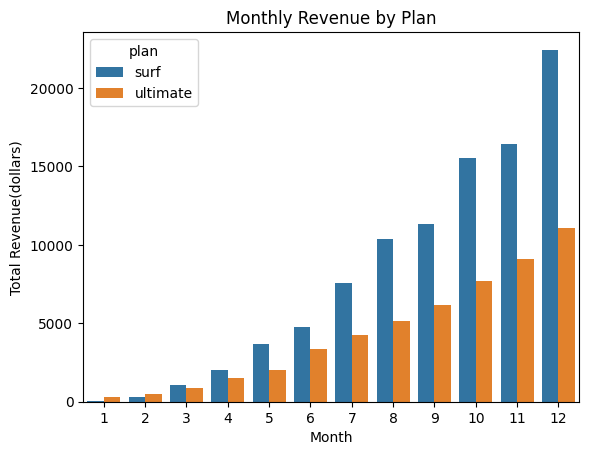

In [45]:
#print(plan_merge)
plan_monthly_revenue = plan_merge.groupby(['plan','month'])['monthly_revenue'].agg(['sum','mean']).reset_index()
print(plan_monthly_revenue)

sns.barplot(data=plan_monthly_revenue, x='month', y = 'sum', hue='plan')
plt.xlabel('Month')
plt.ylabel('Total Revenue(dollars)')
plt.title('Monthly Revenue by Plan')
plt.show()

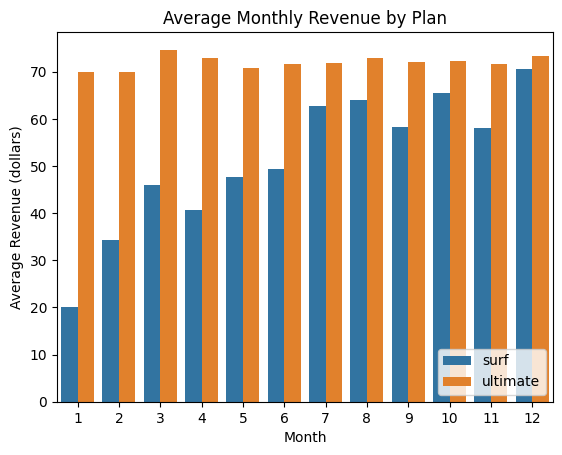

In [46]:
sns.barplot(data=plan_monthly_revenue, x='month', y = 'mean', hue='plan')
plt.xlabel('Month')
plt.ylabel('Average Revenue (dollars)')
plt.title('Average Monthly Revenue by Plan')
plt.legend(loc='lower right')
plt.show()

In [47]:
# Calculate the mean and the variance of the monthly call duration
surf_revenue_mean = plan_merge[plan_merge['plan'] == 'surf']['monthly_revenue'].mean()
print('Surf revenue mean is:', surf_revenue_mean)
surf_revenue_variance = plan_merge[plan_merge['plan'] == 'surf']['monthly_revenue'].var()
print('Surf revenue variance is:',surf_revenue_variance )
surf_revenue_std = plan_merge[plan_merge['plan'] == 'surf']['monthly_revenue'].std()
print('Surf revenue standard deviation is:', surf_revenue_std )
ultimate_revenue_mean = plan_merge[plan_merge['plan'] == 'ultimate']['monthly_revenue'].mean()
print('Ultimate revenue mean is:',ultimate_revenue_mean )
ultimate_revenue_variance = plan_merge[plan_merge['plan'] == 'ultimate']['monthly_revenue'].var()
print('Ultimate revenue variance is:', ultimate_revenue_variance)
ultimate_revenue_std = plan_merge[plan_merge['plan'] == 'ultimate']['monthly_revenue'].std()
print('Ultimate revenue standard deviation is:', ultimate_revenue_std)



Surf revenue mean is: 60.706408137317226
Surf revenue variance is: 3067.835152293878
Surf revenue standard deviation is: 55.388041600095214
Ultimate revenue mean is: 72.32777777777778
Ultimate revenue variance is: 129.91326988100758
Ultimate revenue standard deviation is: 11.397950249102141


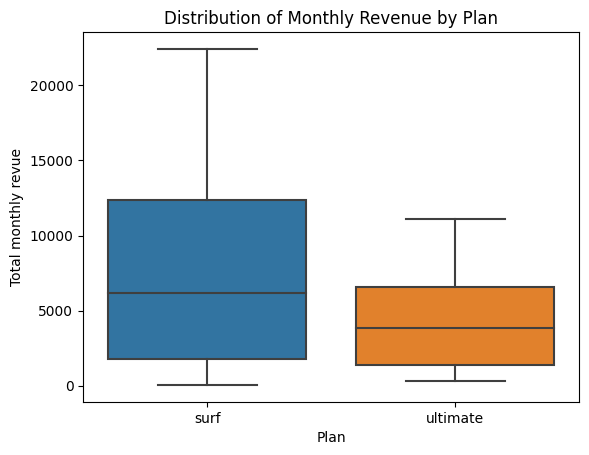

In [48]:
sns.boxplot(data=plan_monthly_revenue, x='plan', y='sum')

plt.xlabel('Plan')
plt.ylabel('Total monthly revue')
plt.title('Distribution of Monthly Revenue by Plan')
plt.show()

    Total revenue from both plans is increasing from the first month. Only the average monthly revenue per customer is increasing for surf users. The box plot also shows a drastically bigger spread in revenue from surf users to ultimate users signaling again that their has been a bigger change in revenue for surf users.

## Test statistical hypotheses

<div class="alert alert-block alert-info">
<b>Ho: The average revenue from Surf and Ultimate plan users are equal

    H1: The average revenue from users of Ultimate and Surf calling plans differs. 
</b> <a class="tocSkip"></a>
</div>

In [49]:
# Test the hypotheses
surf_rev = plan_merge[plan_merge['plan'] == 'surf']['monthly_revenue']
ultimate_rev = plan_merge[plan_merge['plan'] == 'ultimate']['monthly_revenue']
alpha = 0.05 # your code: set a critical statistical significance level

results = st.ttest_ind(surf_rev, ultimate_rev, equal_var = False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:# your code: compare the p-value you get with the significance level):
    print("We reject the null hypothesis: there is a significant difference in average revenue.")
else:
    print("We can't reject the null hypothesis: there is not a significant difference in average revenue.")

p-value: 2.9470895360990864e-15
We reject the null hypothesis: there is a significant difference in average revenue.


<div class="alert alert-block alert-info">
<b>Ho: The average revenue from users in NY-NJ area is equal to that of the users from other regions.

    H1: The average revenue from users in NY-NJ area is different from that of the users from other regions.
</b> <a class="tocSkip"></a>
</div>

In [50]:
# Test the hypotheses
#plan_merge_city = pd.merge(plan_merge, users[['user_id', 'city']], on='user_id', how='left')
#print(plan_merge_city.sample(10))
NY_NJ_rev = plan_merge[plan_merge['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']
#print(NY_NJ_rev)
other_region_rev = plan_merge[plan_merge['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']
#print(other_region_rev)

alpha = 0.05 # your code: set a critical statistical significance level
results1 = st.ttest_ind(NY_NJ_rev,other_region_rev , equal_var = False)
print('p-value:', results1.pvalue)
if results.pvalue < alpha:# your code: compare the p-value you get with the significance level):
    print("We reject the null hypothesis: there is a significant difference in average revenue.")
else:
    print("We can't reject the null hypothesis: there is not a significant difference in average revenue.")

p-value: 0.03339197612239338
We reject the null hypothesis: there is a significant difference in average revenue.


## General conclusion


    Overall the ultimate plan has a more predictable, steady revenue stream. This is mainly due to this plan having very high package limits for minutes, texts, and data. The surf plan has the potential to be more profitible but it requires for users to continuosly exceed their plan limits. This could eventually lead surf users to switch plans into ultimate to avoid paying higher fees.